# Gaussian_Mixture_Model Lab

1. boston_housing.csv 파일을 boston_df 데이터 프레임으로 만들어서 medv 컬럼을 제외한 컬럼들을 이용해서 GMM 알고리즘을 적용할 결과를 PCA를 적용한 후 visualize_cluster_plot() 함수를 이용하여 가시화하시오(단 군집의 수는 7개로 하시오).
군집화 전에 medv 컬럼을 제외한 컬럼들에 대한 Min-Max Scaling을 수행하시오.

In [1]:
#from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
boston_df = pd.read_csv('../../data/boston_housing.csv')
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
boston_scaled = MinMaxScaler().fit_transform(boston_df.drop('medv', axis=1))
boston_scaled_df=pd.DataFrame(data= boston_scaled,columns=boston_df.columns[:-1])

In [4]:
### Function to visualize clustering results  
import numpy as np
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*','P','D','H','v','>','<']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[0])  #label
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

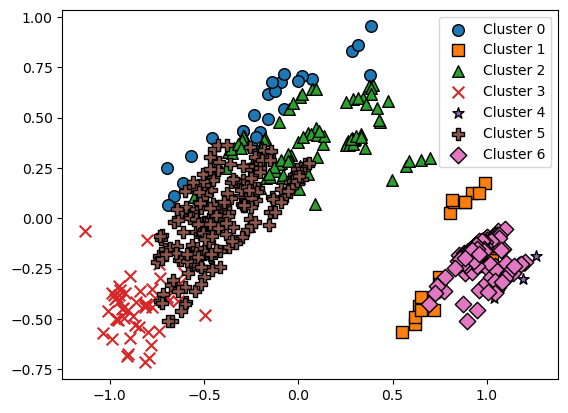

In [5]:
# GMM 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=7, random_state=0).fit(boston_scaled_df)


from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(boston_scaled_df)

boston_df['ftr1'] = pca_transformed[:,0]
boston_df['ftr2'] = pca_transformed[:,1]
boston_df['cluster']=gmm.predict(boston_scaled_df)
visualize_cluster_plot(gmm, boston_df,'cluster',iscenter=False)